# 高德API应用模块展现!


1. 地理/逆地理编码
2. 路径规划
3. 行政区域查询
4. 搜索POI
5. 静态地图
6. IP定位
7. 坐标转换
8. 天气查询
9. 输入提示
10. 批量请求接口
11. 交通态势
12. 地理围栏
13. 轨迹纠偏

In [140]:
import pandas as pd
import requests

# 地理编码

In [141]:
key ="9bddd2ca2cd9a740d789df864e5c026f"
def geocode(address,city=None,batch=None,sig=None)->dict:   
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
美树星城 = geocode(address='云南省昆明市官渡区美树星城')
print(美树星城)
df_美树星城地理编码 = pd.json_normalize(美树星城['geocodes'])
display(df_美树星城地理编码)
美树星城地理编码 = 美树星城['geocodes'][0]['location']
print("美树星城地理编码:",美树星城地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '云南省昆明市官渡区美树星城', 'country': '中国', 'province': '云南省', 'citycode': '0871', 'city': '昆明市', 'district': '官渡区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '530111', 'street': [], 'number': [], 'location': '102.732156,25.024332', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,云南省昆明市官渡区美树星城,中国,云南省,0871,昆明市,官渡区,[],530111,[],[],"102.732156,25.024332",兴趣点,[],[],[],[]


美树星城地理编码: 102.732156,25.024332


# 逆地理编码

In [142]:
import requests
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
美树星城逆地理编码 = regeocode('102.732156,25.024332')
print(美树星城逆地理编码)
df_美树星城逆地理编码 = pd.json_normalize(美树星城逆地理编码).T
display(df_美树星城逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '昆明市', 'province': '云南省', 'adcode': '530111', 'district': '官渡区', 'towncode': '530111003000', 'streetNumber': {'number': '6号', 'location': '102.732163,25.0240289', 'direction': '南', 'distance': '33.707', 'street': '环城南路'}, 'country': '中国', 'township': '吴井街道', 'businessAreas': [{'location': '102.755034,25.036406', 'name': '金马', 'id': '530111'}, {'location': '102.727778,25.035558', 'name': '拓东', 'id': '530103'}, {'location': '102.743756,25.003479', 'name': '关上', 'id': '530111'}], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0871'}, 'formatted_address': '云南省昆明市官渡区吴井街道环城巷美树星城A座'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,昆明市
regeocode.addressComponent.province,云南省
regeocode.addressComponent.adcode,530111
regeocode.addressComponent.district,官渡区
regeocode.addressComponent.towncode,530111003000
regeocode.addressComponent.streetNumber.number,6号
regeocode.addressComponent.streetNumber.location,"102.732163,25.0240289"


In [143]:
美树星城逆地理编码_all = regeocode(美树星城地理编码,extensions="all")
print(美树星城逆地理编码_all)
df_美树星城逆地理编码_all = pd.json_normalize(美树星城逆地理编码_all)
display(df_美树星城逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '0871G48F03600624157', 'location': '102.732,25.0243', 'direction': '西', 'name': '环城巷', 'distance': '23.749'}, {'id': '0871G48F03600634792', 'location': '102.731,25.0261', 'direction': '东南', 'name': '环城南巷', 'distance': '231.204'}, {'id': '0871G48F036006641966', 'location': '102.731,25.0262', 'direction': '东南', 'name': '环南巷', 'distance': '235.824'}], 'roadinters': [{'second_name': '环城南巷', 'first_id': '0871G48F03600624157', 'second_id': '0871G48F03600634792', 'location': '102.7308903,25.02606611', 'distance': '231.204', 'first_name': '环城巷', 'direction': '东南'}], 'formatted_address': '云南省昆明市官渡区吴井街道环城巷美树星城A座', 'addressComponent': {'city': '昆明市', 'province': '云南省', 'adcode': '530111', 'district': '官渡区', 'towncode': '530111003000', 'streetNumber': {'number': '6号', 'location': '102.732163,25.0240289', 'direction': '南', 'distance': '33.707', 'street': '环城南路'}, 'country': '中国', 'township': '吴井街道', 'businessAreas': [{'location': '102.755034,25.036406'

,status,info,infocode,regeocode.roads,regeocode.roadinters,regeocode.formatted_address,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,...,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.aois,regeocode.pois
0,1,OK,10000,"[{'id': '0871G48F03600624157', 'location': '10...","[{'second_name': '环城南巷', 'first_id': '0871G48F...",云南省昆明市官渡区吴井街道环城巷美树星城A座,昆明市,云南省,530111,官渡区,...,中国,吴井街道,"[{'location': '102.755034,25.036406', 'name': ...",[],[],[],[],0871,"[{'area': '2779.162072', 'type': '120302', 'id...","[{'id': 'B0FFGYGEGQ', 'direction': '东', 'busin..."


In [144]:
roads = pd.json_normalize(美树星城逆地理编码_all['regeocode']['roads'])
roadinters = pd.json_normalize(美树星城逆地理编码_all['regeocode']['roadinters'])
aois = pd.json_normalize(美树星城逆地理编码_all['regeocode']['aois'])
pois = pd.json_normalize(美树星城逆地理编码_all['regeocode']['pois'])

display(roads,roadinters,aois,pois,)


# aois：aoi信息列表请求参数
# pois：poi信息列表请求参数
# roadinters：道路交叉口列表 export：交叉路口到请求坐标的距离 单位：米 方位 输入点相对路口的方位 路口经纬度 第一条道路id 第一条道路名称 第二条道路id 第二条道路名称
# roads：道路信息列表 export: 道路id 道路名称 道路到请求坐标的距离 单位：米 方位 坐标点

,id,location,direction,name,distance
0,0871G48F03600624157,"102.732,25.0243",西,环城巷,23.749
1,0871G48F03600634792,"102.731,25.0261",东南,环城南巷,231.204
2,0871G48F036006641966,"102.731,25.0262",东南,环南巷,235.824


,second_name,first_id,second_id,location,distance,first_name,direction
0,环城南巷,0871G48F03600624157,0871G48F03600634792,"102.7308903,25.02606611",231.204,环城巷,东南


,area,type,id,location,adcode,name,distance
0,2779.162072,120302,B0FFF2HHVZ,"102.731811,25.024164",530111,美树星城A座,0
1,8278.751879,120302,B0FFGYGEGQ,"102.732483,25.024232",530111,美树星城,0
2,4206.155701,120302,B036709DQE,"102.732951,25.024301",530111,美树星城B座,28.658
3,34154.664877,120302,B036705JF4,"102.730699,25.024211",530111,绿洲花园(吴井路),32.3724
4,6788.209400,120302,B03670W2UF,"102.732566,25.023557",530111,吴井新村(环城巷),38.5271


,id,direction,businessarea,address,poiweight,name,location,distance,tel,type
0,B0FFGYGEGQ,东,金马,环城巷绿洲花园附近,0.174381,美树星城,"102.732483,25.024232",34.7696,[],商务住宅;住宅区;住宅小区
1,B03670YXHF,西,金马,吴井路222号,0.260457,绿洲花园幼儿园(吴井路),"102.731556,25.024498",63.2157,[],科教文化服务;学校;幼儿园
2,B0FFG4HOYV,西,金马,吴井路绿洲花园9-15,0.48,一心堂(昆明吴井路五店),"102.730084,25.024694",212.644,[],医疗保健服务;医疗保健服务场所;医疗保健服务场所
3,B036711NOL,东北,金马,香樟俊园2期7幢10-11号,0.135015,香樟俊园社区卫生服务站,"102.733438,25.025179",159.859,0871-63357829,医疗保健服务;综合医院;卫生院
4,B036709BUC,西南,金马,吴井路248号,0.48,V8假日酒店(吴井路),"102.730671,25.022658",238.823,0871-63577868;0871-63533868,住宿服务;宾馆酒店;四星级宾馆
5,B0FFG4FLHE,西,金马,吴井路222号,0.204391,南站幼儿园绿洲花园分园,"102.730505,25.023872",174.055,0871-63545033,科教文化服务;学校;幼儿园
6,B0FFF62B7Z,东北,金马,民航路26号香樟俊园二期5-6商铺2楼(具体请电话咨询),0.178912,源梦家舞蹈培训中心,"102.733728,25.025456",201.778,13629674801,科教文化服务;培训机构;培训机构
7,B03670W2UF,东南,金马,环城巷4号14-15幢,0.235997,吴井新村(环城巷),"102.732566,25.023557",95.5704,[],商务住宅;住宅区;住宅小区
8,B03670W3DM,西南,金马,环城巷10-1号附近,0.101551,中共吴井路社区支部委员会,"102.730863,25.023264",176.299,[],政府机构及社会团体;政府机关;乡镇以下级政府及事业单位
9,B0FFH5K5OI,西,金马,环城巷绿洲花园9栋,0.13236,民航路社区居委会,"102.730464,25.024951",183.887,[],政府机构及社会团体;政府机关;乡镇以下级政府及事业单位


# 路径规划1之步行导航

In [145]:
# 步行导航
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [146]:
# 输入目的地


昆明双塔 = geocode('昆明双塔')
昆明双塔_location = 昆明双塔['geocodes'][0]['location']
美树星城_location = 美树星城['geocodes'][0]['location']
print("(start)美树星城_location:",美树星城_location,"(end)昆明双塔_location:",昆明双塔_location)

(start)美树星城_location: 102.732156,25.024332 (end)昆明双塔_location: 102.832891,24.880095


In [147]:
美树星城_汕头大学 = walking(美树星城_location,昆明双塔_location)
df_步行 = pd.json_normalize(美树星城_汕头大学["route"]["paths"][0]['steps'])
display(df_步行)
df_步行["instruction"]
# 再步行的路上 可以走一次人行横道，其他都是普通道路。又因为这段道路特殊的交通通道少，所以高德地图返回基本正确。

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,沿环城巷向东南步行611米左转,东南,环城巷,611,489,"102.732387,25.024306;102.732483,25.024184;102....",左转,[],0
1,沿长润街向东北步行217米右转,东北,长润街,217,174,"102.736081,25.019848;102.736233,25.019918;102....",右转,[],0
2,沿民航路向东南步行1901米向左前方行走,东南,民航路,1901,1521,"102.73806,25.020647;102.73885,25.019878;102.73...",向左前方行走,[],0
3,沿关景路向东步行654米向右前方行走,东,关景路,654,523,"102.748503,25.006298;102.748845,25.00612;102.7...",向右前方行走,[],0
4,沿雨龙路向东南步行1869米左转,东南,雨龙路,1869,1495,"102.754944,25.006354;102.755421,25.006141;102....",左转,[],0
5,沿昌宏西路向东步行163米右转,东,昌宏西路,163,130,"102.762274,24.991966;102.762405,24.991966;102....",右转,[],0
6,向东南步行494米右转,东南,[],494,395,"102.763906,24.991949;102.764036,24.991706;102....",右转,[],0
7,沿彩云北路向南步行90米向左前方行走,南,彩云北路,90,72,"102.766411,24.988073;102.766411,24.987387;102....",向左前方行走,[],0
8,沿昆洛路向东南步行124米向右前方行走,东南,昆洛路,124,99,"102.766463,24.987257;102.766554,24.987179;102....",向右前方行走,[],0
9,沿昆洛路向东南步行2121米左转,东南,昆洛路,2121,1697,"102.767309,24.986458;102.767452,24.986246;102....",左转,[],0


0           沿环城巷向东南步行611米左转
1           沿长润街向东北步行217米右转
2      沿民航路向东南步行1901米向左前方行走
3        沿关景路向东步行654米向右前方行走
4          沿雨龙路向东南步行1869米左转
5           沿昌宏西路向东步行163米右转
6               向东南步行494米右转
7        沿彩云北路向南步行90米向左前方行走
8       沿昆洛路向东南步行124米向右前方行走
9          沿昆洛路向东南步行2121米左转
10           沿云秀路向东北步行48米右转
11        沿昆洛公路向东南步行2276米直行
12          沿昆洛路向南步行4798米直行
13           沿兴呈路向南步行308米左转
14    沿彩云中路向东南步行3259米向左前方行走
15              步行23米向左前方行走
16            沿石龙路向东步行12米右转
17                  步行39米右转
18                向南步行78米左转
19     沿彩云中路向南步行1116米向左前方行走
20             沿彩云中路步行51米左转
21           沿春融街向东步行147米右转
22                    步行11米
23                  步行11米左转
24       沿春融街向东步行225米向右前方行走
25          沿和谐路步行78米向右前方行走
26           沿和谐路向南步行653米左转
27            沿吉安街向东步行59米左转
28                向北步行12米右转
29                向东步行43米左转
30             向北步行54米到达目的地
Name: instruction, dtype: object

# 路径规划2之公交车路线规划

In [148]:
# 公车导航
def integrated(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [149]:
昆明双塔 = geocode('昆明双塔')
昆明双塔_location = 昆明双塔['geocodes'][0]['location']
美树星城_location = 美树星城['geocodes'][0]['location']
print("(start)美树星城_location:",美树星城_location,"(end)昆明双塔_location:",昆明双塔_location)

(start)美树星城_location: 102.732156,25.024332 (end)昆明双塔_location: 102.832891,24.880095


In [150]:
美树星城_昆明双塔 = integrated(美树星城_location,昆明双塔_location,city='昆明',extensions='all')
df_bus = pd.json_normalize(美树星城_昆明双塔)
df_bus

,status,info,infocode,count,route.origin,route.destination,route.distance,route.taxi_cost,route.transits
0,1,OK,10000,5,"102.732156,25.024332","102.832891,24.880095",24216,71.77984000000001,"[{'cost': '4.0', 'duration': '3443', 'nightfla..."


In [151]:
pd.json_normalize(美树星城_昆明双塔["route"]['transits'])

,cost,duration,nightflag,walking_distance,distance,missed,segments
0,4.0,3443,0,880,24254,1,"[{'taxi': [], 'walking': {'origin': '102.73235..."
1,4.0,3880,0,1915,24251,1,"[{'taxi': [], 'walking': {'origin': '102.73238..."
2,5.0,4468,0,2207,24680,1,"[{'taxi': [], 'walking': {'origin': '102.73210..."
3,5.0,3864,0,875,24565,1,"[{'taxi': [], 'walking': {'origin': '102.73210..."
4,5.0,4182,0,870,26919,1,"[{'taxi': [], 'walking': {'origin': '102.73210..."


In [152]:
pd.json_normalize(美树星城_昆明双塔["route"]['transits'][0]['segments'])

,taxi,entrance,exit,walking.origin,walking.destination,walking.distance,walking.duration,walking.steps,bus.buslines,railway.via_stops,railway.alters,railway.spaces
0,[],[],[],"102.732353,25.024094","102.731781,25.021038",490,420,"[{'instruction': '沿环城巷步行248米左转', 'road': '环城巷'...","[{'departure_stop': {'name': '吴井路', 'id': '530...",[],[],[]
1,[],[],[],"102.832809,24.877157","102.832962,24.879921",390,334,"[{'instruction': '沿和谐路步行230米右转', 'road': '和谐路'...",[],[],[],[]


In [153]:
df_bus_乘车信息 = pd.json_normalize(美树星城_昆明双塔["route"]['transits'][0]['segments'][0]['bus']["buslines"])
df_bus_乘车信息

,name,id,type,distance,duration,polyline,bustimetag,start_time,end_time,via_num,via_stops,departure_stop.name,departure_stop.id,departure_stop.location,arrival_stop.name,arrival_stop.id,arrival_stop.location
0,202路(昆明站(站前路)--雨花公交枢纽站(大学城地铁站)),530100011294,普通公交线路,23374,2689,"102.731804,25.021046;102.731804,25.021042;102....",2,[],[],5,"[{'name': '官渡广场(国贸路)', 'id': '530100011294005'...",吴井路,530100011294004,"102.731804,25.021046",二号楼(和谐路),530100011294017,"102.832848,24.877018"


In [154]:
_地铁路线 = pd.json_normalize(美树星城_昆明双塔["route"]['transits'][0]['segments'][0]['bus']["buslines"][0]["via_stops"]).rename(columns={"name":"地铁路线"})
display(_地铁路线)


# 太神奇了，可以直接看到你需要路进哪几个站，最后在春融街下车

,地铁路线,id,location
0,官渡广场(国贸路),530100011294005,"102.743469,25.012106"
1,新螺蛳湾公交枢纽站(彩云北路),530100011294006,"102.774582,24.928377"
2,昆三中(春融东路),530100011294007,"102.834633,24.885811"
3,市委(春融东路),530100011294014,"102.836334,24.881142"
4,政务服务中心(锦绣大街),530100011294016,"102.836266,24.877327"


# 行政区域

In [155]:
# 行政区域级别划分
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [156]:
行政区域 = district(keywords='福建',extensions='all',subdistrict=2)
df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])
display(df_行政区域_1级,)

,citycode,adcode,name,center,level,districts
0,0591,350100,福州市,"119.306239,26.075302",city,"[{'citycode': '0591', 'adcode': '350121', 'nam..."
1,0593,350900,宁德市,"119.527082,26.65924",city,"[{'citycode': '0593', 'adcode': '350924', 'nam..."
2,0597,350800,龙岩市,"117.02978,25.091603",city,"[{'citycode': '0597', 'adcode': '350881', 'nam..."
3,0599,350700,南平市,"118.178459,26.635627",city,"[{'citycode': '0599', 'adcode': '350723', 'nam..."
4,0592,350200,厦门市,"118.11022,24.490474",city,"[{'citycode': '0592', 'adcode': '350203', 'nam..."
5,0596,350600,漳州市,"117.661801,24.510897",city,"[{'citycode': '0596', 'adcode': '350629', 'nam..."
6,0594,350300,莆田市,"119.007558,25.431011",city,"[{'citycode': '0594', 'adcode': '350302', 'nam..."
7,0595,350500,泉州市,"118.589421,24.908853",city,"[{'citycode': '0595', 'adcode': '350526', 'nam..."
8,0598,350400,三明市,"117.635001,26.265444",city,"[{'citycode': '0598', 'adcode': '350402', 'nam..."


In [157]:
df_行政区域_2级_福州 = pd.json_normalize(行政区域["districts"][0]['districts'][8]['districts'])
display(df_行政区域_2级_福州 )

# 行政区域的查询一定更需要api平台的算法，因为它包含的是整个地区的一线 二线三线等地域。

,citycode,adcode,name,center,level,districts
0,0598,350402,梅列区,"117.63687,26.269208",district,[]
1,0598,350403,三元区,"117.607418,26.234191",district,[]
2,0598,350429,泰宁县,"117.177522,26.897995",district,[]
3,0598,350423,清流县,"116.815821,26.17761",district,[]
4,0598,350481,永安市,"117.364447,25.974075",district,[]
5,0598,350424,宁化县,"116.659725,26.259932",district,[]
6,0598,350425,大田县,"117.849355,25.690803",district,[]
7,0598,350430,建宁县,"116.845832,26.831398",district,[]
8,0598,350426,尤溪县,"118.188577,26.169261",district,[]
9,0598,350427,沙县,"117.789095,26.397361",district,[]


# 搜索POI（关键字）


In [158]:
# 搜索POI（关键字）
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [159]:
自助餐 = place_text('自助餐','自助餐',city="昆明",children=1,extensions='all')
自助餐

{'status': '1',
 'count': '489',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B03670WBHP',
   'parent': 'B036709KCW',
   'childtype': '312',
   'name': '金鹰广场酒店自助餐',
   'tag': '三文鱼,肥牛卷,仔羊腿,南美甜虾,生蚝,芝士焗青龙虾,小火锅,火腿豆焖饭,米线,人浓汤泉水生鱼锅,牛大柳,五花肉,蟹粉小丸子,带皮羊腩,傣香鸡,凉拌黑木耳,冰淇淋,金箔手撕鸡,四季豆煲鹅肝粒',
   'type': '餐饮服务;中餐厅;海鲜酒楼',
   'typecode': '050119',
   'biz_type': 'diner',
   'address': '威远街168号金鹰广场酒店9层',
   'location': '102.713681,25.040455',
   'tel': '0871-65098720;0871-65098888',
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '530000',
   'pname': '云南省',
   'citycode': '0871',
   'cityname': '昆明市',
   'adcode': '530102',
   'adname': '五华区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3702454720',
   'distance': [],
   'navi_poiid': 'G48F036006_209498',
   'entr_location': [],
   'business_area': [],
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestamp': '2020-0

In [160]:
df_自助餐 = pd.json_normalize(自助餐["pois"])
df_自助餐_自助餐 = pd.json_normalize(自助餐["pois"][7]["children"])
display(df_自助餐,df_自助餐_自助餐)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering
0,B03670WBHP,B036709KCW,312,金鹰广场酒店自助餐,"三文鱼,肥牛卷,仔羊腿,南美甜虾,生蚝,芝士焗青龙虾,小火锅,火腿豆焖饭,米线,人浓汤泉水生...",餐饮服务;中餐厅;海鲜酒楼,050119,diner,威远街168号金鹰广场酒店9层,"102.713681,25.040455",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,149.00,0
1,B0FFFRZUSK,B0FFJMW1BP,202,佳客来牛排自助(正义坊店),"火锅,西冷牛排冰淇淋,黑椒牛扒,西瓜,果盘,麻辣烫涮菜,可乐鸡尾酒,巧克力小蛋糕,洋芋,鸡排...",餐饮服务;外国餐厅;牛扒店(扒房),050211,diner,正义路正义坊南馆3层,"102.709675,25.039541",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,64.00,0
2,B0FFFA6W2D,B0367057PF,201,莱茵家乐自助餐厅(新西南广场),"自助牛扒,提拉米苏,巧克力喷泉,水果披萨,酸奶,糖醋里脊,烤鸡翅根,抹茶蛋糕,巧克力雪糕,五...",餐饮服务;外国餐厅;牛扒店(扒房),050211,diner,人民中路17号新西南广场F6层,"102.715483,25.041901",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",B0367057PF,6,F6,126580210600471_B0FFFA6W2D,4.0,58.00,0
3,B0FFHEPO0C,B03670865G,202,高品会牛排(正义坊总店),"澳洲菲力牛排,水果,薯条,风味牛排,炸鸡,鸡腿,寿司,布丁,沙拉,冰淇淋,自助餐,糕点,奶茶...",餐饮服务;外国餐厅;牛扒店(扒房),050211,diner,光华街正义坊购物中心北馆2层,"102.709717,25.040644",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,59.00,0
4,B03670X4IE,B03670865G,202,台北帮厨牛排沙拉吧(正义路),"黑椒牛排,奶冻,纽约客牛排,小蛋糕,鸡排,自助沙拉,鱼排,澳洲雪花牛排,冰淇淋,蔬菜沙拉,酸...",餐饮服务;外国餐厅;牛扒店(扒房),050211,diner,正义路100号正义坊购物中心北馆3层,"102.709667,25.040707",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,62.00,0
5,B0FFHWDNT6,B0FFM6CG6V,202,昆明捞一品重庆自助火锅,"牛肉,毛肚,鸳鸯锅底,鸭肠,自助甜品小食,自助调料,牛蛙,黄辣丁,子母锅,肥羊,汤锅,鸭舌,...",餐饮服务;中餐厅;火锅店,050117,diner,人民中路17号昆明走廊一期商场第五层4K2-1-2、4K3-1-2号33号档口,"102.713254,25.041058",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,64.00,0
6,B0FFH7JG4M,B0FFM6CG6V,202,味尊老北京涮羊肉自助火锅店,[],餐饮服务;餐饮相关场所;餐饮相关,050000,diner,护国街道办事处人民中路17号昆明走廊一期2层C1-C2号,"102.713512,25.041043",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],5.0,39.00,0
7,B0FFGSFD4O,B03670W3SP,202,鑫胖胖中餐厅(昆明走廊店),"烤五花肉,牛肉卷,大虾,鸡皮,蔬菜,鸡翅中,水果拼盘,小火锅,烧烤,豆腐,烤培根,清汤锅底,...",餐饮服务;中餐厅;中餐厅,050100,diner,"人民中路昆明走廊3楼左走廊二楼,电梯3楼","102.713944,25.041028",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,58.00,0
8,B0FFGG40HT,[],[],麦瑞缇牛排自助,"牛排,贝壳花甲,小糕点,蓝莓慕斯蛋糕,巧克力小蛋糕,水果沙拉,蔬菜沙拉,提拉米苏蛋糕,鸡肉,...",餐饮服务;外国餐厅;牛扒店(扒房),050211,diner,祥云街53号2楼,"102.712548,25.036671",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,54.00,0
9,B0FFJOG2LE,B0FFJMW1BP,202,SEA西雅图海鲜自助餐厅,"基围虾,鲍鱼,牛排,三文鱼,螃蟹,刺身,鲜榨果汁,雪蟹腿,儿童晚餐,海参,八爪鱼,榴莲披萨,...",餐饮服务;中餐厅;中餐厅,050100,diner,光华街与正义西街交叉口正义坊购物中心南馆2层2-10,"102.709570,25.038954",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.5,146.00,0


""


In [161]:
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [162]:

df_美树星城 = place_around( 美树星城_location)
df_美树星城


{'status': '1',
 'count': '861',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFK6IXN3',
   'parent': [],
   'childtype': [],
   'name': '串裹春秋烧烤吧',
   'type': '餐饮服务;餐饮相关场所;餐饮相关',
   'typecode': '050000',
   'biz_type': 'diner',
   'address': '环城巷北50米',
   'location': '102.732244,25.024277',
   'tel': [],
   'distance': '10',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFLBSIUU',
   'parent': [],
   'childtype': [],
   'name': '北方手工水饺',
   'type': '餐饮服务;中餐厅;中餐厅',
   'typecode': '050100',
   'biz_type': 'diner',
   'address': '吴井街道办事处环城巷美树星城A一F号商铺',
   'location': '102.732244,25.024406',
   'tel': [],
   'distance': '12',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '1',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFHMQC31',
   'parent': [],
   'childtype': [],
   'name': '足艺堂',
   'type': '生活服务;洗浴推拿场所;洗浴推拿场所',
   'ty

In [163]:
df_美树星城 = pd.json_normalize(df_美树星城['pois'])
df_美树星城

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,importance,shopid,shopinfo,poiweight,photos
0,B0FFK6IXN3,[],[],串裹春秋烧烤吧,餐饮服务;餐饮相关场所;餐饮相关,050000,diner,环城巷北50米,"102.732244,25.024277",[],10,[],[],[],0,[],[]
1,B0FFLBSIUU,[],[],北方手工水饺,餐饮服务;中餐厅;中餐厅,050100,diner,吴井街道办事处环城巷美树星城A一F号商铺,"102.732244,25.024406",[],12,[],[],[],1,[],[]
2,B0FFHMQC31,[],[],足艺堂,生活服务;洗浴推拿场所;洗浴推拿场所,071400,[],环城南巷美树新城A座,"102.732156,25.024453",[],13,[],[],[],0,[],[]
3,B03670W26F,[],[],腾冲特色饵丝(美树星城店),餐饮服务;快餐厅;快餐厅,050300,diner,[],"102.732194,25.024136",0871-66011756;13577018743,22,[],[],[],1,[],[]
4,B0FFG1NQPL,[],[],环城巷民贸公司宿舍,商务住宅;住宅区;宿舍,120303,[],环城巷6号,"102.732403,25.024507",[],31,[],[],[],0,[],[]
5,B0FFF2HHVZ,B0FFGYGEGQ,308,美树星城A座,商务住宅;住宅区;住宅小区,120302,[],环城南路环城巷6号,"102.731811,25.024164",[],39,[],[],[],0,[],[]
6,B0FFHI12LE,[],[],新亚企航(吴井新村西北),生活服务;中介机构;中介机构,071600,[],老民航路26号,"102.732415,25.024029",[],42,[],[],[],0,[],[]
7,B03670W2VH,[],[],中国体育彩票,生活服务;彩票彩券销售点;彩票彩券销售点,071800,[],环城巷4号11幢附近,"102.732595,25.024257",0871-63577381,45,[],[],[],0,[],[]
8,B03670W1IS,[],[],中国福利彩票,生活服务;彩票彩券销售点;彩票彩券销售点,071800,[],环城巷4号-11幢附近,"102.732616,25.024242",13619659863,47,[],[],[],0,[],[]
9,B0FFL6WWAV,[],[],菜鸟驿站(昆明美树星辰B座2号店),生活服务;物流速递;物流速递,070500,[],吴井街道美树星城B座2-2号商铺,"102.732614,25.024233",4001787878,47,[],[],[],0,[],[]


# 静态地图

In [164]:
# 静态地图
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

In [165]:
双塔 = geocode('昆明双塔')
双塔_location = 双塔['geocodes'][0]['location']


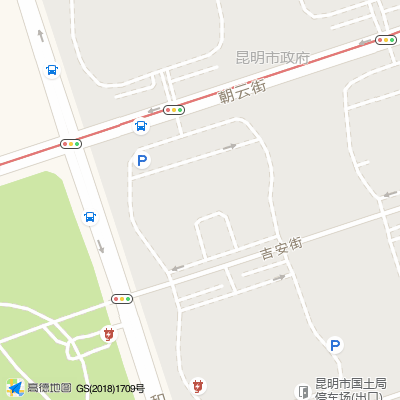

In [166]:
staticmap(location=双塔_location, zoom=16)


# IP定位

In [167]:
def ip(ip=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params={
        'key':key,
        'ip':ip,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [168]:
云南丽江ip = ip(ip='182.240.229.28')
云南丽江ip

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '云南省',
 'city': '丽江市',
 'adcode': '530700',
 'rectangle': '100.1284182,26.78026913;100.3237903,26.95489592'}

# 交通态势

In [169]:
def transport(rectangle=None,callback=None,level=None,sig=None,extensions="base",)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key': key,
        'rectangle':rectangle,
        'level':level,
        'extensions':extensions,
        'sig':sig,
        'callback':callback,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [170]:
transport('116.351147,39.966309;116.357134,39.968727',extensions="base")
# 这个也是用的高德api平台web参考文档中的ip。

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

# 坐标转换

In [171]:
def adress(locations,coordsys=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key': key,
        'locations':locations,
        'coordsys':coordsys,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [172]:
美树星城 = adress('102.732156,25.024332','gps')
美树星城

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '102.733645833334,25.021393500435'}

# 天气查询

In [173]:
def weather(city,extensions=None)->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key,
        'city':city,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [174]:
weather(city='350181',extensions="base")

## 出行首先要先了解天气情况

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '福建',
   'city': '福清市',
   'adcode': '350181',
   'weather': '阴',
   'temperature': '12',
   'winddirection': '东北',
   'windpower': '4',
   'humidity': '82',
   'reporttime': '2020-04-23 22:25:31'}]}

# 批量请求

In [175]:
parameters = {
    "key":key,
}
body ={
        "ops":[
            {
                "url": "/v3/place/around?offset=10&page=1&key=c48d7391025d651c4a078f7fa0b299d9&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
            },
            
                {
                "url": "/v3/place/around?offset=10&page=1&key=c48d7391025d651c4a078f7fa0b299d9&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
            }
            
        ]
        
    }
r=requests.get("https://restapi.amap.com/v3/batch?",params=parameters,json=body)
data = r.json()
data

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '888',
   'pois': [{'typecode': '080000',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFKKSDDS',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.511528,39.270463',
     'distance': '1082',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': {},
     'poiweight': {},
     'cityname': '廊坊市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '李庄子村兰阳草莓采摘园',
     'childtype': {}},
    {'typecode': '080501',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFJM772Z',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.513958,39.270648',
     'distance': '1205',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永清镇北辛溜附近',
     'poiweight': {},
     'cit

# 输入提示

In [176]:
def input_q(keywords,types,location=None,city=None,citylimit=None,datatype=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params = {
        'key':key,
        'keywords':keywords,
        'types':types,
        'location':location,
        'city':city,
        'citylimit':False,
        'datatype':datatype,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [177]:
自助餐 = input_q('自助餐','050301','116.716534,23.371476',city='昆明',datatype='all')
自助餐

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': [],
   'name': '自助餐',
   'district': [],
   'adcode': [],
   'location': [],
   'address': [],
   'typecode': [],
   'city': []},
  {'id': 'B0FFF922AF',
   'name': '大哥笑自助烤肉(启洪假日城市店)',
   'district': '云南省昆明市五华区',
   'adcode': '530102',
   'location': '102.657423,25.059702',
   'address': '昌源中路启鸿假日城市嘉悦购物广场K栋3层(昌源中路与科锦路交叉处)',
   'typecode': '050118',
   'city': []},
  {'id': 'B0FFH0I38Z',
   'name': '重庆土贼自助老火锅(顺城店)',
   'district': '云南省昆明市五华区',
   'adcode': '530102',
   'location': '102.706174,25.036590',
   'address': '大观街道东风西路19号五华大厦1层',
   'typecode': '050117',
   'city': []},
  {'id': 'B0FFMBQ4OK',
   'name': '海客牛排海鲜自助餐',
   'district': '云南省昆明市官渡区',
   'adcode': '530111',
   'location': '102.769019,24.970576',
   'address': '大都摩托天购物中心4楼',
   'typecode': '050000',
   'city': []},
  {'id': 'B0FFGEGO97',
   'name': '索菲特大酒店自助餐',
   'district': '云南省昆明市西山区',
   'adcode': '530112',
   'location': '102.70147

# 地理围栏

In [178]:
def create(name="围栏",center="116.716534,23.371476",radius="1000",
           valid_time="2020-06-06",desc= "围栏描述"):
    """create创建一个地理围栏"""
    parameters = {
        "key":key,
    }
    body ={
        "name": name,
        "center": "116.716534,23.371476",
        "radius": "1000",
        "enable": "true",
        "valid_time": "2020-06-06",
        "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
        "time": "00:00,11:59;13:00,20:59",
        "desc": "围栏范围描述",
        "alert_condition": "enter;leave"}
    r = requests.post("https://restapi.amap.com/v4/geofence/meta",params=parameters,json=body)
    data = r.json()
    return data

In [179]:
create(name="围栏2",center=geocode("美树星城"))

{'data': {'message': '新增围栏已存在', 'status': '106'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

# 轨迹纠编

In [180]:
def driving():
    parameters = {
        "key":key,
    }
    body = [
        {
            "x":116.449429,
            "y":40.014844,
            "sp":4,
            "ag":110,
            "tm":1478831753},
        {
            "x":116.449639,
            "y":40.014776,
            "sp":3,
            "ag":110,
            "tm":23},
        {
            "x":116.449859,
            "y":40.014716,
            "sp":3,
            "ag":111,
            "tm":33},
        {
            "x":116.450074,
            "y":40.014658,
            "sp":3,
            "ag":110,
            "tm":31},
         {
            "x":116.450273,
            "y":40.014598,
            "sp":3,
            "ag":111,
            "tm":20}]
    r = requests.get("http://restapi.amap.com/v4/grasproad/driving", params=parameters,json=body)
    data = r.json()
    return data

In [181]:
driving()

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

- 根据坐标点抓取道路，即根据给定的坐标点、车辆的方位角以及行驶速度，将用户的轨迹纠偏到路上，从而返回用户实际驾车经过的道路坐标。

# 产品设计

## 1.所需要的高德api功能

* IP定位
* 天气查询
* poi搜索
* 交通态势
* 路线规划

## 2.产品需求

- 当你需要出去玩的时候，首先想的是出行方式，是做地铁还是公交，需要可以评估那种方式更节约时间。
- 出去肯定也需要了解好天气和交通状况。
- 到了那边想了解一下周边，搜索有什么好吃的。

## 3.产品描述

- 这是一款出行攻略app，可以通过高德地图ip定位、天气查询功能，来了解当地天气情况。要是自驾游的话，可以通过交通态势、路线规划来了解到某一路段的堵车情况。
- 另外也可以乘坐交通工具出门，如地铁、公交车之类的，高德地图的路线规划功能，也可以很快的为你找到适合出行的方式。
- 到了目的地，可以通过poi搜索来了解周边，看看有什么好吃的好玩的，高德地图api让你畅快游玩，用的开心，玩的开心。